In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

In [2]:
main_data_dir = "D:/Github/Bitcoin-Transaction-Graph-Elliptic-Data-Set/Data/Elliptic Data Set/elliptic_bitcoin_dataset"
features_data_path = main_data_dir + "/elliptic_txs_features.csv"
class_data_path = main_data_dir + "/elliptic_txs_classes.csv"
egdelist_data_path = main_data_dir + "/elliptic_txs_edgelist.csv"

In [3]:
features_df = pd.read_csv(features_data_path)
classes_df = pd.read_csv(class_data_path)
edges_df = pd.read_csv(egdelist_data_path)

In [4]:
features_df.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,1076,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163591,...,0.073047,-0.039637,1.461330,1.461369,0.018279,0.470019,1.216796,1.151607,1.519700,1.521399
1,2534,6,-0.170834,-0.131425,1.018602,0.028105,0.055376,0.054722,-0.061584,-0.163572,...,1.228858,0.379357,0.955101,0.459257,-0.098889,-0.087490,-0.099080,-0.122137,-0.379970,-0.379288
2,3181,34,1.305212,-0.210553,-1.756361,-0.121970,97.300650,-0.113002,-0.061584,1.348765,...,1.348450,1.590664,0.059948,0.113967,-0.098889,1.969527,0.037532,-0.131010,0.006994,0.017772
3,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,-0.577099,-0.500080,0.241128,0.241406,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,3889,48,-0.086232,-0.101835,-0.646376,-0.121970,17.046997,-0.113002,-0.061584,-0.074885,...,0.501062,0.362510,0.082065,0.114773,-0.098889,8.948005,1.024948,-0.009570,-0.080708,-0.123601


In [5]:
classes_df.head()

,txId,class
0,1076,3
1,2534,2
2,3181,2
3,3321,3
4,3889,3


In [6]:
edges_df.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [7]:
classes_df['class'].value_counts()

3    157205
2     42019
1      4545
Name: class, dtype: int64

<BarContainer object of 3 artists>

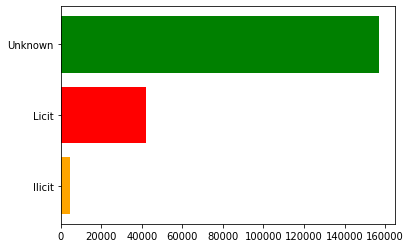

In [8]:
group_class = classes_df.groupby('class').count()
plt.barh(['Ilicit', 'Licit', 'Unknown'], group_class['txId'].values, color=['orange', 'r', 'g'] )

In [9]:
df_class_feature = pd.merge(classes_df, features_df)
df_class_feature.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,1076,3,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,...,0.073047,-0.039637,1.461330,1.461369,0.018279,0.470019,1.216796,1.151607,1.519700,1.521399
1,2534,2,6,-0.170834,-0.131425,1.018602,0.028105,0.055376,0.054722,-0.061584,...,1.228858,0.379357,0.955101,0.459257,-0.098889,-0.087490,-0.099080,-0.122137,-0.379970,-0.379288
2,3181,2,34,1.305212,-0.210553,-1.756361,-0.121970,97.300650,-0.113002,-0.061584,...,1.348450,1.590664,0.059948,0.113967,-0.098889,1.969527,0.037532,-0.131010,0.006994,0.017772
3,3321,3,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.500080,0.241128,0.241406,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399
4,3889,3,48,-0.086232,-0.101835,-0.646376,-0.121970,17.046997,-0.113002,-0.061584,...,0.501062,0.362510,0.082065,0.114773,-0.098889,8.948005,1.024948,-0.009570,-0.080708,-0.123601


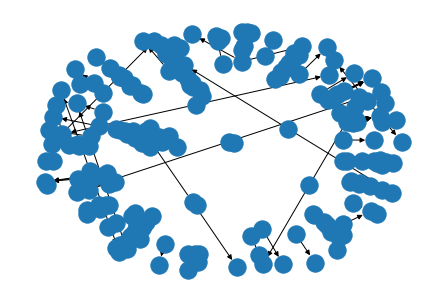

In [31]:
ilicit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == 1), 'txId']
ilicit_edges = edges_df.loc[edges_df['txId1'].isin(ilicit_ids)]
graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

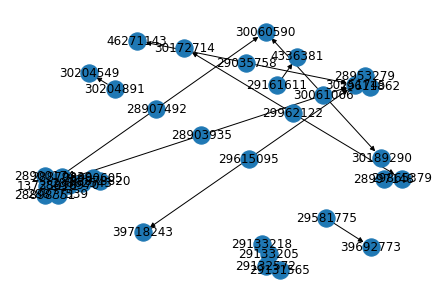

In [34]:
bad_ids = df_class_feature.loc[(df_class_feature['Time step'] == 37) & (df_class_feature['class'] == 1), 'txId']
short_edges = edges_df.loc[edges_df['txId1'].isin(bad_ids)]

graph = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, 
        cmap = plt.get_cmap('rainbow'), 
        with_labels=True, 
        pos=pos)

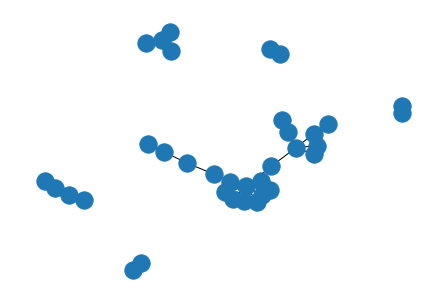

In [35]:
graph1 = nx.from_pandas_edgelist(short_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.Graph())
pos1 = nx.spring_layout(graph1)
nx.draw(graph1, cmap = plt.get_cmap('rainbow'), with_labels=False, pos=pos1)